Nama : Imel Novia Ramadhani

NIM : 202201029

Prodi : Sistem Informasi (A)

TUGAS DATA MINING (KLASIFIKASI MENGGUNAKAN ALGORITMA KNN)

In [83]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [84]:
# Load the uploaded dataset
df = pd.read_csv('data.csv')

In [71]:
# Display the first few rows to understand the structure
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [72]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [73]:
# Hapus kolom tidak relevan
df_clean = df.drop(columns=['id', 'Unnamed: 32'])

In [74]:
# Ubah diagnosis ke bentuk numerik
df_clean['diagnosis'] = df_clean['diagnosis'].map({'M': 1, 'B': 0})

In [75]:
# Pilih dua fitur utama untuk visualisasi
features = ['radius_mean', 'texture_mean']
X = df_clean[features]
y = df_clean['diagnosis']

In [76]:
# Normalisasi fitur
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [77]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42)

In [78]:
# Klasifikasi dengan KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [79]:
# Prediksi dan akurasi
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

In [80]:
accuracy

0.9035087719298246

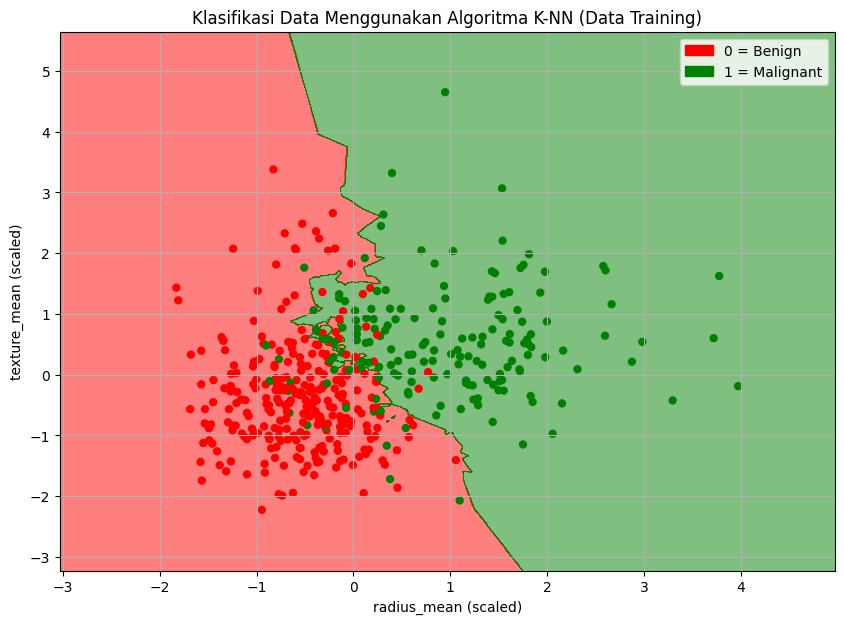

In [81]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches

# Tentukan meshgrid untuk decision boundary
x_min, x_max = X_scaled[:, 0].min() - 1, X_scaled[:, 0].max() + 1
y_min, y_max = X_scaled[:, 1].min() - 1, X_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

# Prediksi pada grid
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Buat plot
plt.figure(figsize=(10, 7))
plt.contourf(xx, yy, Z, alpha=0.5, cmap=ListedColormap(['red', 'green']))
scatter = plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=ListedColormap(['red', 'green']), s=25)

# Legenda yang akurat
benign_patch = mpatches.Patch(color='red', label='0 = Benign')
malignant_patch = mpatches.Patch(color='green', label='1 = Malignant')
plt.legend(handles=[benign_patch, malignant_patch])

# Label dan tampilan
plt.title('Klasifikasi Data Menggunakan Algoritma K-NN (Data Training)')
plt.xlabel('radius_mean (scaled)')
plt.ylabel('texture_mean (scaled)')
plt.grid(True)
plt.show()

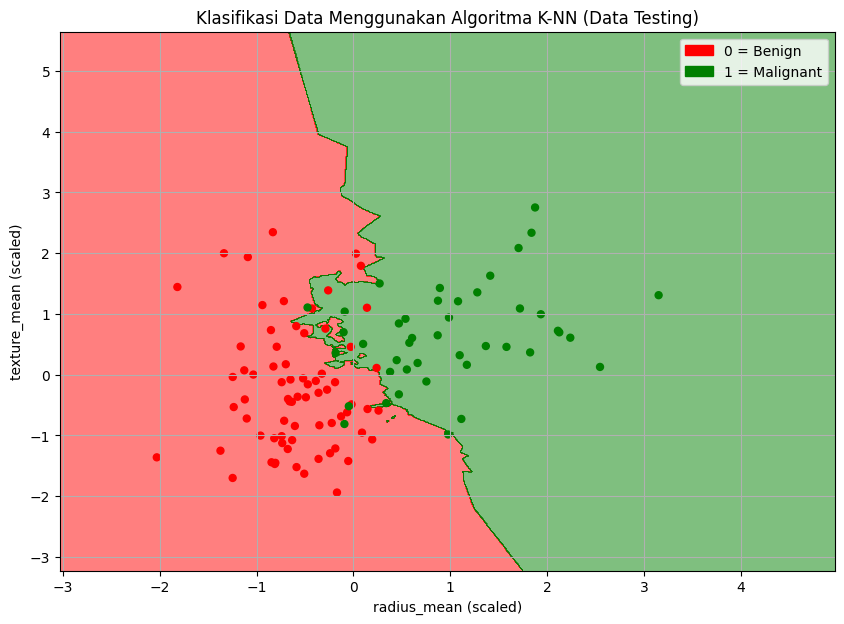

In [82]:
import matplotlib.patches as mpatches

# Buat ulang visualisasi decision boundary untuk data testing
Z_test = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z_test = Z_test.reshape(xx.shape)

plt.figure(figsize=(10, 7))
plt.contourf(xx, yy, Z_test, alpha=0.5, cmap=ListedColormap(['red', 'green']))
scatter = plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=ListedColormap(['red', 'green']), s=25)

# Legenda sesuai warna dan label
benign_patch = mpatches.Patch(color='red', label='0 = Benign')
malignant_patch = mpatches.Patch(color='green', label='1 = Malignant')
plt.legend(handles=[benign_patch, malignant_patch])

plt.title('Klasifikasi Data Menggunakan Algoritma K-NN (Data Testing)')
plt.xlabel('radius_mean (scaled)')
plt.ylabel('texture_mean (scaled)')
plt.grid(True)
plt.show()